In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df_data = pd.read_csv("InterFirmTrade.csv",header = None)
df_data

,0,1
0,0,156959
1,0,257228
2,0,511673
3,0,515026
4,0,935083
...,...,...
3708289,979324,540493
3708290,979324,644431
3708291,979324,816168
3708292,979324,855646


In [4]:
nodes = set(list(df_data[0]) + list(df_data[1]))
print(len(nodes)) #nodes sources
print(len(df_data)) #link sources

979325
3708294


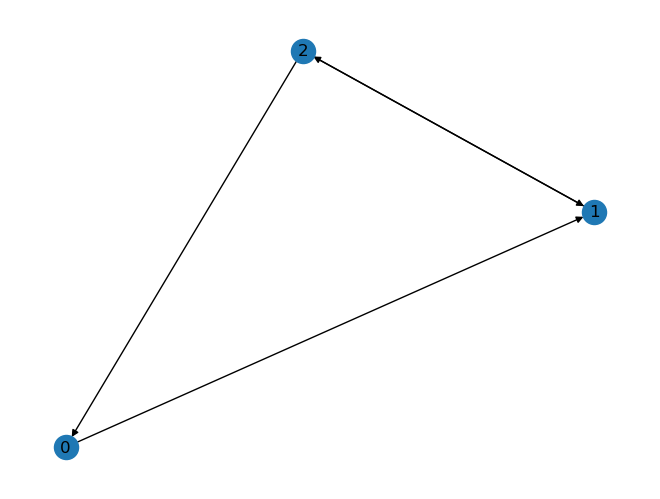

In [8]:
df_B = pd.DataFrame({0:[0,1,2,2],1:[1,2,0,1]}) #start point:0, end point:1
G = nx.from_pandas_edgelist(df_B, source=0, target=1, create_using=nx.DiGraph())
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True)
plt.show()


In [13]:
k_out = df_data[0].value_counts() #出次数
k_in = df_data[1].value_counts() #入次数
print(k_out)
print(k_in)


0
146404    4574
651712    4143
82768     3662
115692    3566
395947    3555
          ... 
110145       1
324850       1
324851       1
324852       1
66018        1
Name: count, Length: 903376, dtype: int64
1
146404    4519
395947    3783
472127    3368
357724    3308
651712    3270
          ... 
118365       1
586832       1
201087       1
321505       1
340722       1
Name: count, Length: 903792, dtype: int64


In [11]:
nodes = set([2,1750,105286])
df_part = df_data[df_data[0].isin(nodes) & df_data[1].isin(nodes)]
df_part
#特定のノードの集合のみからなるリンクを抜き出す

,0,1
16,2,1750
21,2,105286
576961,105286,1750


In [12]:
nodes = set([2,1750,105286])
df_part = df_data[df_data[0].isin(nodes) | df_data[1].isin(nodes)]
df_part
#特定のノードの集合に関わるリンクを抜き出す

,0,1
16,2,1750
17,2,19211
18,2,94924
19,2,100743
20,2,101387
...,...,...
3693592,977285,1750
3697255,977789,1750
3700524,977944,1750
3706124,978940,1750
